# Sheet 5

## 1 Bayes
The desired probability
$$p(\mathrm{gamma ~ray|target~ direction})$$
is given by Bayes' theorem, stating that 
$$p(A|B) = \frac{p(B|A)\cdot p(A)}{p(B)}.$$
Namely,
$$p(\mathrm{gamma ~ray|target~ direction}) = \frac{p(\mathrm{target~ direction|gamma ~ray}) \cdot p(\mathrm{gamma~ ray})}{p(\mathrm{target~direction})}$$ 
$$=\frac{p(\mathrm{target~ direction|gamma ~ray}) \cdot p(\mathrm{gamma~ ray})}{p(\mathrm{target~direction }~\cap ~\mathrm{background}) + p(\mathrm{target~direction }~\cap~ \mathrm{gamma ~ ray}) }$$
$$=\frac{p(\mathrm{target~ direction|gamma ~ray}) \cdot p(\mathrm{gamma~ ray})}{p(\mathrm{target~direction }|\mathrm{background})\cdot p(\mathrm{background}) + p(\mathrm{target~direction }| \mathrm{gamma ~ ray})\cdot p(\mathrm{gamma ~ ray})}$$
$$= \frac{0.95 \cdot 0.1}{0.1\cdot 0.9 + 0.95 \cdot 0.1} =  0.5\overline{13}.$$
We used that the probability of the intersection is given by $p(A ~\cap~B) = p(A|B)\cdot p(B).$ 

## 2 Bayes Classifiers

(a)

The optimal Bayes classifier $f(x)$ minimizes the risk $R(f)$ given evidence $x$:
$$f = \underset{f}{\mathrm{arg ~min}} ~R(f) = \underset{f}{\mathrm{arg ~min}} ~\mathbb{E}_X\mathbb{E}_{Y|X}~L(Y=y| f(X=x)) $$
$$= \underset{f}{\mathrm{arg ~min}} ~ \mathbb{E}_X ~\sum_{y\in \{0,1\}}L(y, f(x)) P(y|x) $$

The expected values are given by 
$$L(0,0) P(y=0∣x)+L(1,0)P(y=1∣x) = 10⋅P(y=1∣x)=10⋅P(y=1∣x) $$
and

$$ L(0,1)P(y=0∣x)+L(1,1)P(y=1∣x)= 1 \cdot P(y=0|x)$$
The decision boundary is given by
$$10P(y=1|x) \le P(y=0|x) = 1- P(y=1|x) \implies  P(y=1|x) \ge \frac{1}{11}$$

such that the estimator can be stated as 

$$f(x) =
  \begin{cases} 
      \hfill 0     \hfill & \text{ if $P(y=1|x) < 1/11$ } \\
      \hfill 1     \hfill & \text{ if $P(y=1|x) \ge 1/11$} \\
  \end{cases}
  .$$

Using this estimator could be useful when false negatives are much more costly than false positives, e.g. malignant cancer detection. 

(b)

The derivation is identical to the $k$-class 0-1-loss with the exception of the added rejection risk:

For all $f(x)\in \{1, \ldots, k\}$: $$\mathbb{E}_{Y|X} L(y, \hat{y} = f(x)|x) = 1- P(f(x)|x).$$

For $f(x) = 0$:  $$\mathbb{E}_{Y|X} L(y, \hat{y}=f(x)|x) = \alpha $$

The optimal classifier minimizes the risk, which means that it prefers to reject a classification if the class with the highest posterior fails to exceed the bound $1-\alpha$:
$$P_{\max}(f(x)|x) < 1 - \alpha \implies \mathrm{reject}$$

When the posterior probability of all classes are approximately equal, one might set $\alpha \ge (k-1)/k - \epsilon$ where $\epsilon > 0$ is some safety term in order to only allow classifications when the classifier is truly confident.

## 3
QDA
### (a)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')
pts.shape, labels.shape

((300,), (300,))

In [3]:
mu = []
sigma = []
for label in sorted(np.unique(labels).astype(int)):
    mask = labels == label
    selection = pts[mask]
    mu.append(selection.sum()/len(selection))
    sigma.append(
        (
            (selection**2).sum()/len(selection) - mu[-1]**2
        )**0.5
    )

### (b)

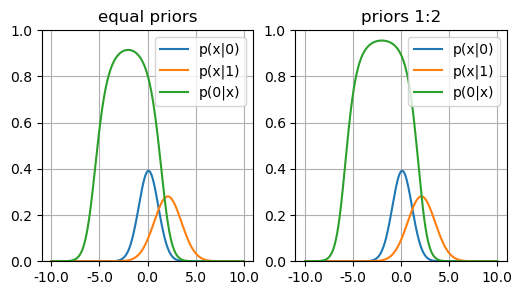

In [4]:
def normal1d(x, mu, sigma):
    return (2*3.14159265*sigma**2)**-0.5 * np.exp( - (x-mu)**2 / (2*sigma**2))

fig, axes = plt.subplots(1,2, figsize=(6,3))
axes = axes.flatten()
x = np.linspace(-10, 10, 2001)
y0 = normal1d(x, mu[0], sigma[0])
y1 = normal1d(x, mu[1], sigma[1])
prior0 = 1 # arbitrary scaling cancels out in fraction
prior1 = 1
p1 = y0*prior0/(y0*prior0 + y1 * prior1)
axes[0].plot(y0, label="p(x|0)")
axes[0].plot(y1, label="p(x|1)")
axes[0].plot(p1, label="p(0|x)")
axes[0].set_title("equal priors")
axes[0].set_xticks(np.linspace(0, 2000,5), np.linspace(-10, 10, 5))
prior0 = 2
prior1 = 1
p1 = y0*prior0/(y0*prior0 + y1 * prior1)
axes[1].plot(y0, label="p(x|0)")
axes[1].plot(y1, label="p(x|1)")
axes[1].plot(p1, label="p(0|x)")
axes[1].set_title("priors 1:2")
axes[1].set_xticks(np.linspace(0, 2000,5), np.linspace(-10, 10, 5))
axes[0].grid()
axes[1].grid()
axes[0].set_ylim(0, 1)
axes[1].set_ylim(0, 1)
axes[0].legend()
axes[1].legend();

We observe that a higher prior of class 0 indeed changes the posterior distribution of that class. The resulting posterior distribution favors class 0 but is still symmetric.

## 4 Trees and Random Forests

(a) 
1. Parent node impurity:
* $H_{P,\mathrm{Gini}} = 1- 2*\frac{400}{800}^2 = 1/2$
* $H_{P,\mathrm{Entropy}} =  -2* \frac{400}{800} \log_2 \frac{400}{800} = 1$
3. Misclassification error:
* $\mathrm{E} =1-\max_c p(c|\mathrm{node})$
* $E_{A1} = E_{A2}= 1- \frac{300}{300+100} = 1/4$
* $E_{B1} = 1 - \frac{200}{200+0} = 0$
* $E_{B2} = 1- \frac{400}{200+400} = 1/3$
3. Gini
* $H_{A1} = H_{A2} = 1- \frac{300}{400}^2 -\frac{100}{400}^2 = 6/16$
* $H_{B1} = 1 - \frac{200}{200}^2 = 0$
* $H_{B2} = 1 - \frac{200}{600}^2 - \frac{400}{600}^2 = 4/9$
4. Entropy
* $H_{A1} = H_{A2} = - \frac{100}{400}\log_2 {100/400} - \frac{300}{400}\log2\frac{300}{400} \approx 0.81 $
* $H_{B1} = 0$
* $H_{B2} = -\frac{200}{600}\log_2\frac{200}{600} - \frac{400}{600}\log_2\frac{400}{600} \approx 0.92$

The resulting uncertainty decreases are
* Gini, A:
  $\Delta H_A =\frac{400}{800}( H_{A1} + H_{A2}) - H_{P,\mathrm{Gini}} = \frac{1\cdot2\cdot6}{2\cdot16} - 8/16 = -1/8$
* Gini, B:
  $\Delta H_B = \frac{200}{800}H_{B1} + \frac{600}{800}H_{B2} - H_{P,\mathrm{Gini}} = \frac{3\cdot 4}{4\cdot 9} - 1/2 = -1/6 < -1/8$
* Entropy, A:
  $\Delta H_A = -0.19$
  $\Delta H_B = - 0.31 < 0.19$
Thus, both uncertainty criteria prefer split B.

(b)

In [5]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: Sort the points to easily split them

# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate

def probabilities(partition):
    # divide counts by size of dataset to get cluster probabilites
    return np.unique(partition, return_counts=True)[1] / len(partition)

def compute_split_measure(l, l0, l1, method):
    p0 = probabilities(l0)
    p1 = probabilities(l1)
    p = probabilities(l)
    return method(p) - (len(l0) * method(p0) + len(l1) * method(p1)) / (len(l))

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one
# TODO: Then, Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)

### (b)

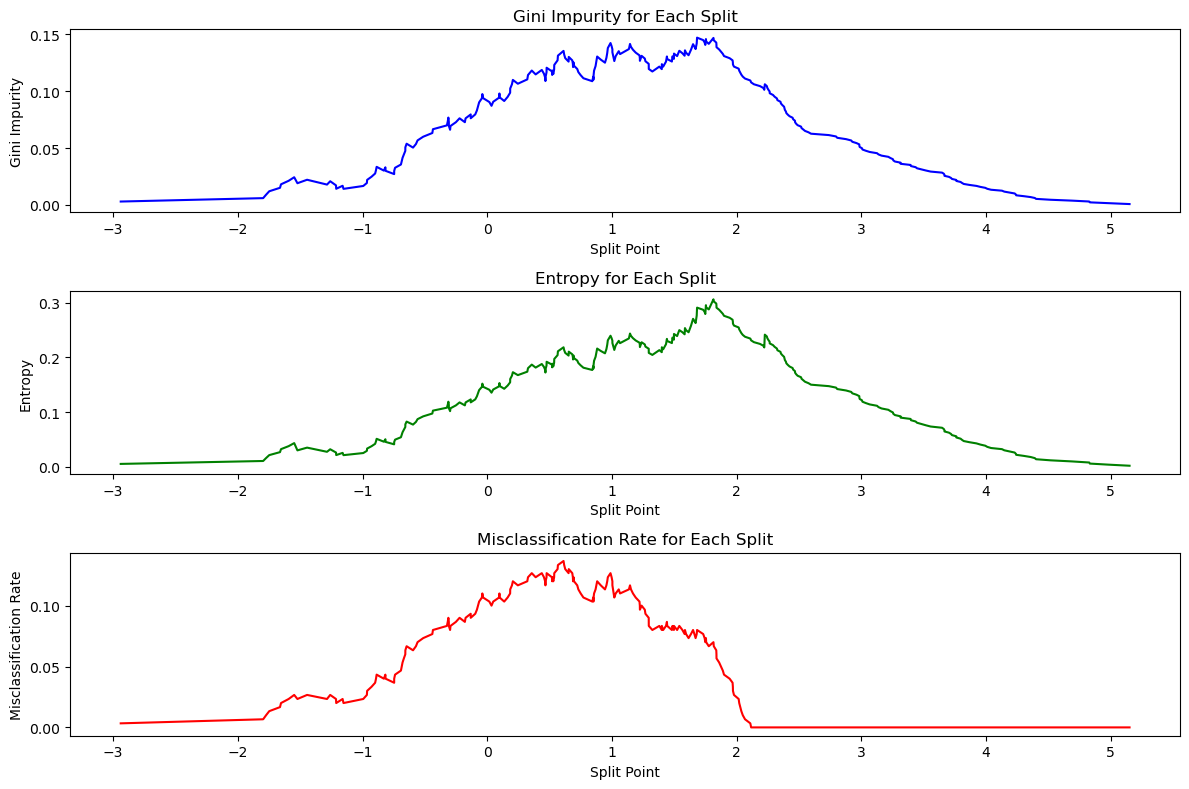

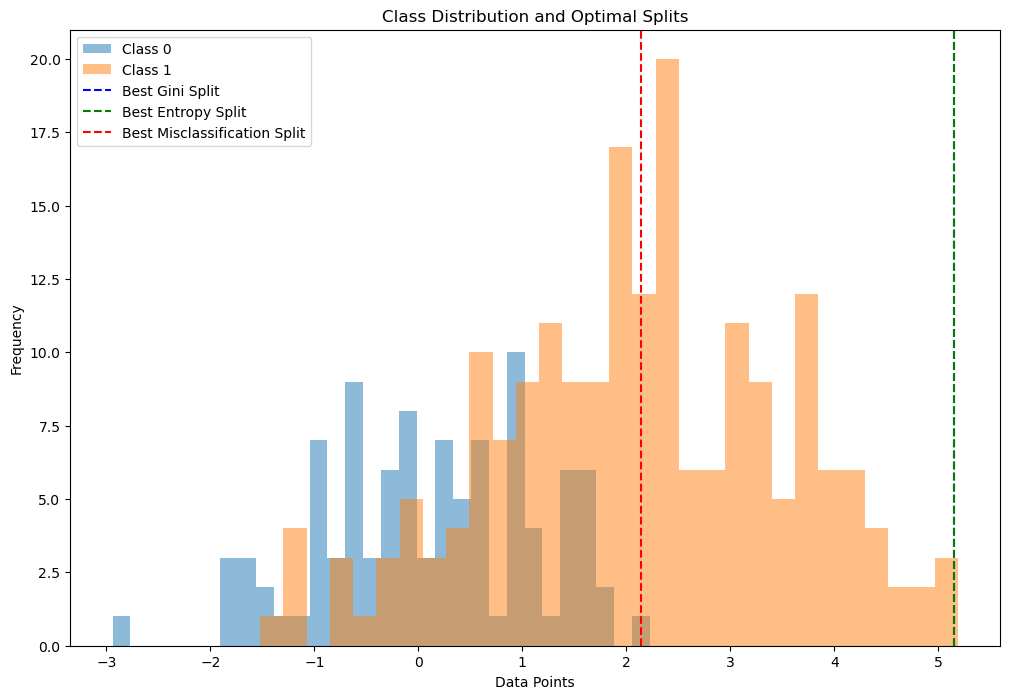

In [6]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: Sort the points to easily split them

sorted_indices = np.argsort(pts)
sorted_pts = pts[sorted_indices]
sorted_labels = labels[sorted_indices]


# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate

def gini_impurity(p):
    return 1 - np.sum(p**2)

def entropy(p):
    return -np.sum(p * np.log2(p + np.finfo(float).eps))  # Avoid log(0)

def misclassification_rate(p):
    return 1 - np.max(p)

def probabilities(partition):
    # divide counts by size of dataset to get cluster probabilites
    return np.unique(partition, return_counts=True)[1] / len(partition)

def compute_split_measure(l, l0, l1, method):
    p0 = probabilities(l0)
    p1 = probabilities(l1)
    p = probabilities(l)
    return method(p) - (len(l0) * method(p0) + len(l1) * method(p1)) / (len(l))

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one

gini_values = []
entropy_values = []
misclassification_values = []

# Iterate over potential splits (between each pair of consecutive data points)
for i in range(1, len(sorted_pts)):
    # Split the dataset into two parts
    l0 = sorted_labels[:i]
    l1 = sorted_labels[i:]
    
    # Compute the split measure for each criterion
    gini_values.append(compute_split_measure(sorted_labels, l0, l1, gini_impurity))
    entropy_values.append(compute_split_measure(sorted_labels, l0, l1, entropy))
    misclassification_values.append(compute_split_measure(sorted_labels, l0, l1, misclassification_rate))

# TODO: Then, Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)

# Plot Gini impurity, entropy, and misclassification rate
plt.figure(figsize=(12, 8))

# Gini Impurity Plot
plt.subplot(3, 1, 1)
plt.plot(sorted_pts[:-1], gini_values, label='Gini Impurity', color='blue')
plt.title('Gini Impurity for Each Split')
plt.xlabel('Split Point')
plt.ylabel('Gini Impurity')

# Entropy Plot
plt.subplot(3, 1, 2)
plt.plot(sorted_pts[:-1], entropy_values, label='Entropy', color='green')
plt.title('Entropy for Each Split')
plt.xlabel('Split Point')
plt.ylabel('Entropy')

# Misclassification Rate Plot
plt.subplot(3, 1, 3)
plt.plot(sorted_pts[:-1], misclassification_values, label='Misclassification Rate', color='red')
plt.title('Misclassification Rate for Each Split')
plt.xlabel('Split Point')
plt.ylabel('Misclassification Rate')

plt.tight_layout()
plt.show()

# Create histograms of the class distribution with vertical lines showing splits
plt.figure(figsize=(12, 8))
plt.hist(pts[labels == 0], bins=30, alpha=0.5, label='Class 0')
plt.hist(pts[labels == 1], bins=30, alpha=0.5, label='Class 1')
plt.axvline(sorted_pts[np.argmin(gini_values)], color='blue', linestyle='dashed', label='Best Gini Split')
plt.axvline(sorted_pts[np.argmin(entropy_values)], color='green', linestyle='dashed', label='Best Entropy Split')
plt.axvline(sorted_pts[np.argmin(misclassification_values)], color='red', linestyle='dashed', label='Best Misclassification Split')
plt.title('Class Distribution and Optimal Splits')
plt.xlabel('Data Points')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [7]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy').T
labels = np.load('data/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)

from sklearn.model_selection import train_test_split


# Splitting the data into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(features, labels, test_size=200, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=200, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

# TODO: train a random forest classifier for each combination of specified hyperparameters 
#       and evaluate the performances on the validation set.

# Example hyperparameter grid (you can modify this as needed)
hyperparameter_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],     # Max depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples to split a node
}

# Placeholder to track best performance
best_score = 0
best_params = None

# Iterate over all combinations of hyperparameters
for n_estimators in hyperparameter_grid['n_estimators']:
    for max_depth in hyperparameter_grid['max_depth']:
        for min_samples_split in hyperparameter_grid['min_samples_split']:
            
            # Initialize the RandomForestClassifier with the current hyperparameters
            clf = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42
            )
            
            # Train the model on the training set
            clf.fit(X_train, y_train)
            
            # Evaluate on the validation set
            y_val_pred = clf.predict(X_val)
            val_accuracy = accuracy_score(y_val, y_val_pred)
            
            # Print the performance for the current hyperparameter combination
            print(f"n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split} => Validation Accuracy: {val_accuracy:.4f}")
            
            # Update best score and parameters if current model is better
            if val_accuracy > best_score:
                best_score = val_accuracy
                best_params = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split
                }

# Print the best hyperparameters and their performance
print(f"\nBest Validation Accuracy: {best_score:.4f}")
print("Best Hyperparameters:", best_params)




n_estimators=50, max_depth=None, min_samples_split=2 => Validation Accuracy: 0.8000
n_estimators=50, max_depth=None, min_samples_split=5 => Validation Accuracy: 0.7850
n_estimators=50, max_depth=None, min_samples_split=10 => Validation Accuracy: 0.7650
n_estimators=50, max_depth=10, min_samples_split=2 => Validation Accuracy: 0.7650
n_estimators=50, max_depth=10, min_samples_split=5 => Validation Accuracy: 0.7500
n_estimators=50, max_depth=10, min_samples_split=10 => Validation Accuracy: 0.7800
n_estimators=50, max_depth=20, min_samples_split=2 => Validation Accuracy: 0.8100
n_estimators=50, max_depth=20, min_samples_split=5 => Validation Accuracy: 0.7850
n_estimators=50, max_depth=20, min_samples_split=10 => Validation Accuracy: 0.7650
n_estimators=100, max_depth=None, min_samples_split=2 => Validation Accuracy: 0.8000
n_estimators=100, max_depth=None, min_samples_split=5 => Validation Accuracy: 0.7800
n_estimators=100, max_depth=None, min_samples_split=10 => Validation Accuracy: 0.77

## 5 Bivariate Normal 
We consider the bivariate normal $\mathcal{N}(\boldsymbol{x}| \boldsymbol{\mu}, \boldsymbol{\Sigma}) =  \mathcal{N}(\boldsymbol{x}| \boldsymbol{\mu}, \boldsymbol{\Lambda}^{-1})$ with $\boldsymbol{x} = (x_1, x_2)^T$ and covariance matrix $\boldsymbol{\Sigma}$ to show that its conditional and marginal probability densities $p(x_1|x_2=c)$ and $p(x_1) = \int\mathrm{d}x_2 p(\boldsymbol{x})$ are again normal with certain parameters.

(a) Conditional
$$\log{p(\boldsymbol{x})} \propto \begin{bmatrix}x_1 -\mu_1 \\ x_2 -\mu_2\end{bmatrix}^\mathrm{T} \begin{bmatrix}\Lambda_{11} & \Lambda_{12}\\ \Lambda_{21} & \Lambda_{22}\end{bmatrix} \begin{bmatrix}x_1 -\mu_1 \\ x_2 -\mu_2\end{bmatrix}$$
$$= \begin{bmatrix}\bar{x}_1\\ \bar{x}_2 \end{bmatrix}^\mathrm{T} \begin{bmatrix}\Lambda_{11} & \Lambda_{12}\\ \Lambda_{21} & \Lambda_{22}\end{bmatrix} \begin{bmatrix}\bar{x}_1 \\ \bar{x}_2 \end{bmatrix}$$
$$=\bar{x}_1^2 \Lambda_{11} + \bar{x}_1\bar{x}_2(\Lambda_{12}+ \Lambda_{21}) + \bar{x}_2^2 \Lambda_{22}$$
$$=(x_1^2+ \mu_1^2 -2x_1\mu_1)\Lambda_{11} + (x_1x_2 + \mu_1\mu_2 - x_1\mu_2 -x_2\mu_1)(\Lambda_{12}+ \Lambda_{21}) + c$$
$$=x_1(x_1 - 2\mu_1)\Lambda_{11} + x_1(x_2-\mu_2)(\Lambda_{12}+\Lambda_{21}) + c$$
$$\simeq x_1^2 \Lambda_{11} +x_1 ((\Lambda_{12}+\Lambda_{21})(x_2 -\mu_2 ) -2\mu_1\Lambda_{11})  \stackrel{!}{=} \Sigma_{1|2} (x_1^2 - 2\mu_{1|2} x_1)$$ 
$$\implies  \Sigma_{1|2} = \Lambda_{11}^{-1} = \Sigma_{11} -\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}$$
$$\mu_{1|2} = -\frac{\Lambda_{12}+\Lambda_{21}}{2\Lambda_{11}}(x_2-\mu_2) + \mu_1 = -\frac{\Lambda_{12}}{\Lambda_{11}}(x_2-\mu_2)+\mu_1 = \Sigma_{12}\Sigma_{22}^{-1}(x_2-\mu_2)+ \mu_1$$
where we used that the accuracy matrix and precision matrix are symmetric in the calculation of $\mu_{1|2}$.